In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')

# Basics

In [86]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [9]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [10]:
df.shape

(1525, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [55]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [8]:
df['vote'] = df['vote'].astype('category')
df['gender'] = df['gender'].astype('category')

In [98]:
df.describe().round(2)

,Age,Economic Cond. National,Economic Cond. Household,Blair,Hague,Europe,Political Knowledge
count,1525.00,1525.00,1525.00,1525.00,1525.00,1525.00,1525.00
mean,54.18,3.25,3.14,3.33,2.75,6.73,1.54
std,15.71,0.88,0.93,1.17,1.23,3.30,1.08
min,24.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,41.00,3.00,3.00,2.00,2.00,4.00,0.00
50%,53.00,3.00,3.00,4.00,2.00,6.00,2.00
75%,67.00,4.00,4.00,4.00,4.00,10.00,2.00
max,93.00,5.00,5.00,5.00,5.00,11.00,3.00


# EDA

In [7]:
new_column_names = {'vote': 'Vote', 'age': 'Age', 'economic.cond.national': \
                    'Economic Cond. National', 'economic.cond.household': 'Economic Cond. Household', \
                    'Blair' : 'Blair', 'Hague':'Hague', 'Europe':'Europe',\
                    'political.knowledge':'Political Knowledge', 'gender':'Gender'}

In [8]:
df.rename(columns=new_column_names, inplace=True)

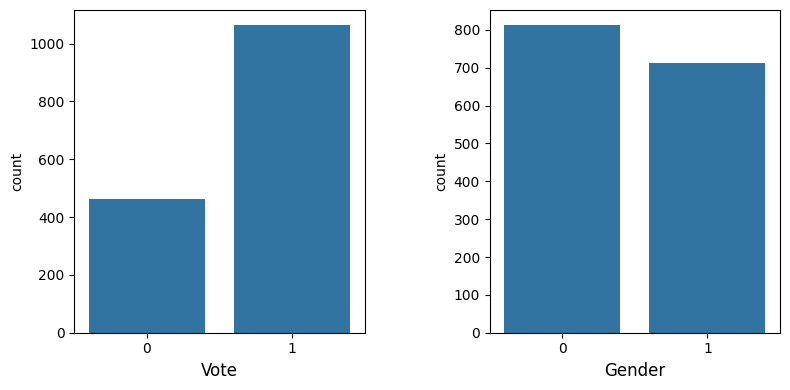

In [179]:
plt.figure(figsize=(8,4))
# plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
sns.countplot(x=df['Vote'])
plt.xlabel('Vote', fontsize=12)
plt.subplot(1,2,2)
sns.countplot(x=df['Gender']);
plt.xlabel('Gender', fontsize=12)
plt.tight_layout(w_pad=5)

In [181]:
feature_list = df.select_dtypes(include=['number']).columns

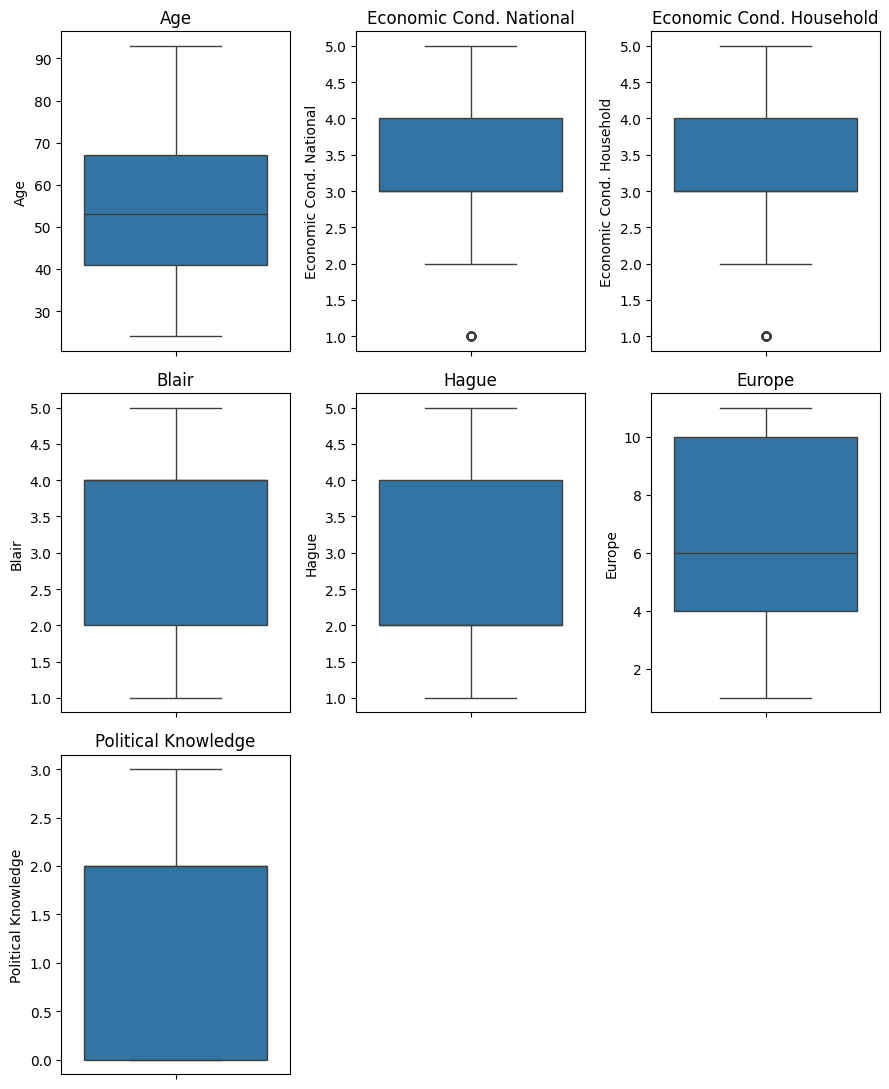

In [61]:
plt.figure(figsize = (9,11))
for i in range(7):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y = df[feature_list[i]], data=df)
    plt.title('{}'.format(feature_list[i]))
    plt.tight_layout()

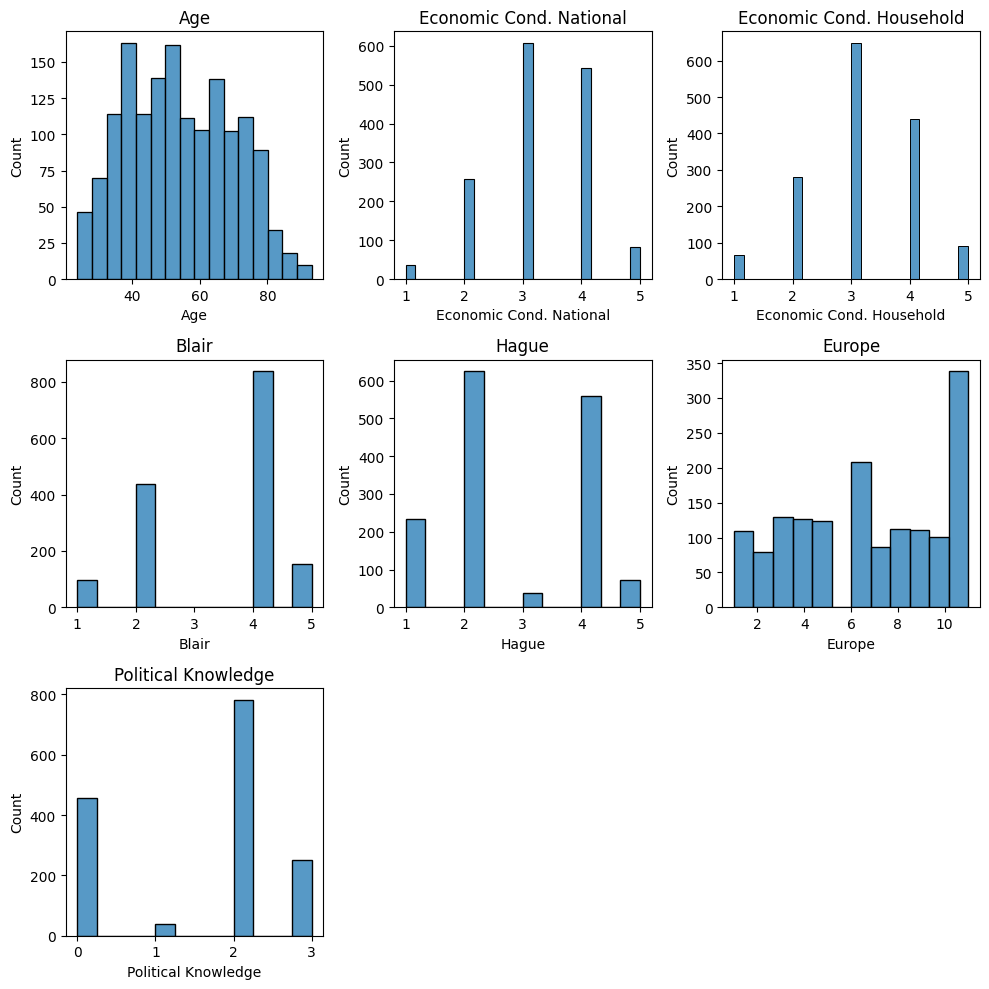

In [185]:
plt.figure(figsize = (10,10))
for i in range(7):
    plt.subplot(3, 3, i+1)
    sns.histplot(x = df[feature_list[i+1]], data=df)
    plt.title('{}'.format(feature_list[i+1]))
    plt.tight_layout()

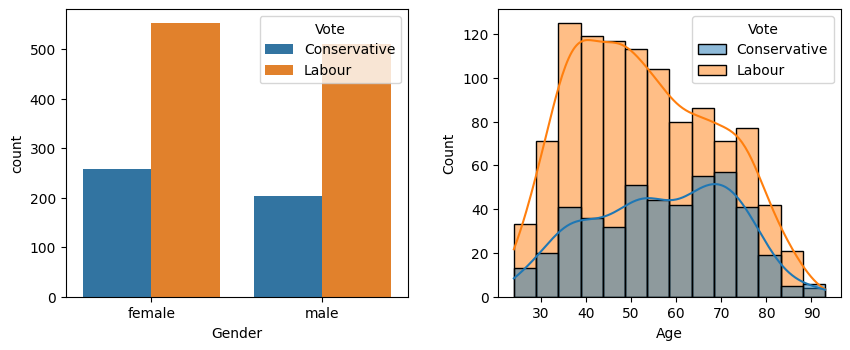

In [102]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.countplot(x=df['Gender'], hue='Vote', data=df);
plt.subplot(1,2,2)
sns.histplot(x=df['Age'], hue=df['Vote'], binwidth=5, kde=True);
plt.tight_layout(pad=2.5)

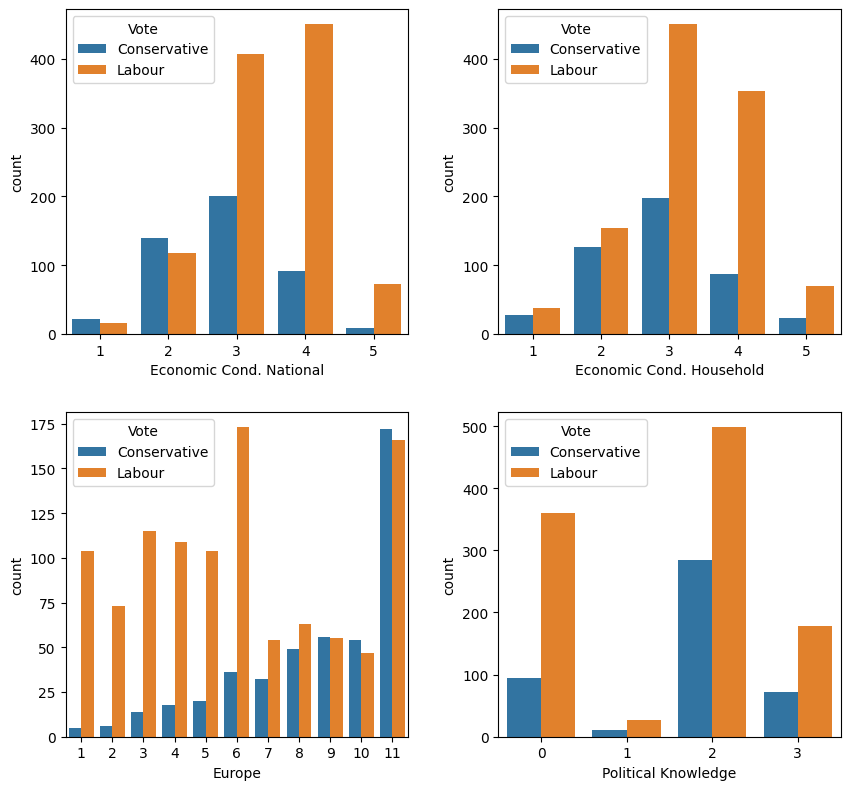

In [87]:
plt.figure(figsize=(9,12))
plt.subplot(3,2,1)
sns.countplot(x=df['Economic Cond. National'], hue=df['Vote']);
plt.subplot(3,2,2)
sns.countplot(x=df['Economic Cond. Household'], hue=df['Vote']);
plt.subplot(3,2,3)
sns.countplot(x=df['Europe'], hue=df['Vote']);
plt.subplot(3,2,4)
sns.countplot(x=df['Political Knowledge'], hue=df['Vote']);
plt.tight_layout(pad=2.5)

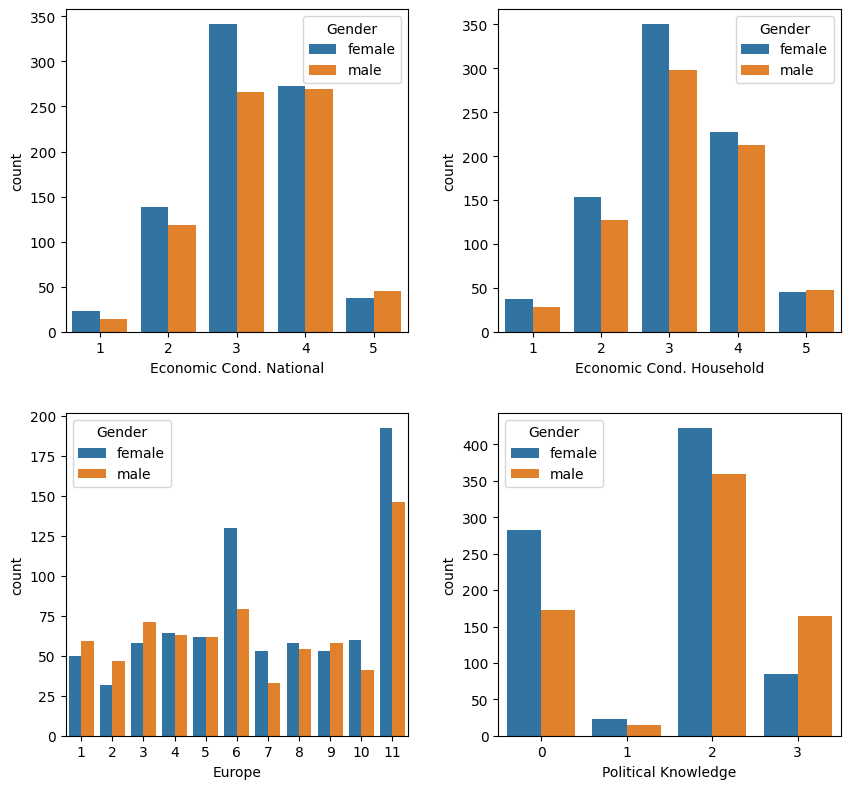

In [88]:
plt.figure(figsize=(9,12))
plt.subplot(3,2,1)
sns.countplot(x=df['Economic Cond. National'], hue=df['Gender']);
plt.subplot(3,2,2)
sns.countplot(x=df['Economic Cond. Household'], hue=df['Gender']);
plt.subplot(3,2,3)
sns.countplot(x=df['Europe'], hue=df['Gender']);
plt.subplot(3,2,4)
sns.countplot(x=df['Political Knowledge'], hue=df['Gender']);
plt.tight_layout(pad=2.5)

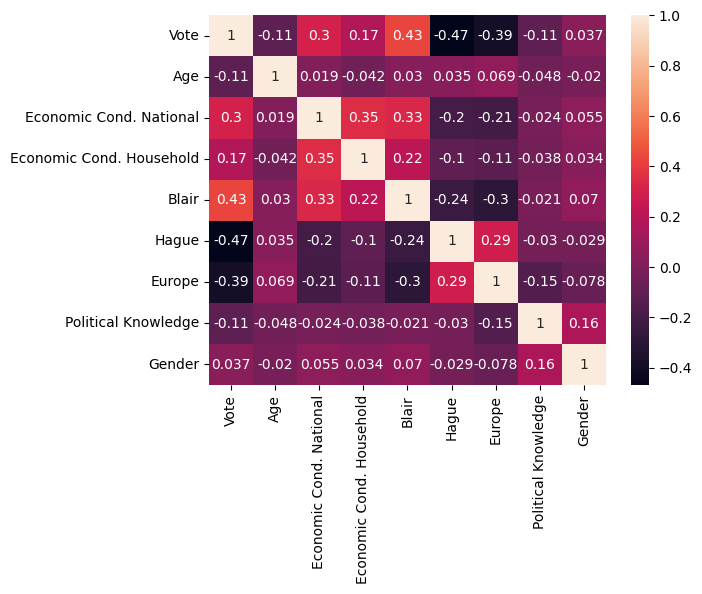

In [145]:
sns.heatmap(df.corr(), annot=True);

# Model Building

## KNN

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [10]:
NNH = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [11]:
df.groupby('Vote', observed=False)['Vote'].count()

Vote
Conservative     462
Labour          1063
Name: Vote, dtype: int64

In [58]:
df.head()

,Vote,Age,Economic Cond. National,Economic Cond. Household,Blair,Hague,Europe,Political Knowledge,Gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [12]:
df_encode = df

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

In [14]:
codes_vote = {'Labour': 1, 'Conservative': 0}
codes_gender = {'male': 1, 'female': 0}

In [15]:
df_encode['Vote'] = df_encode['Vote'].map(codes_vote)

In [16]:
df_encode['Gender'] = df_encode['Gender'].map(codes_gender)

In [101]:
df_encode.head()

,Vote,Age,Economic Cond. National,Economic Cond. Household,Blair,Hague,Europe,Political Knowledge,Gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [102]:
df_encode['Gender'].unique()

array([0, 1])

#### Train Test Split w/ Scaling

In [175]:
X_encode = df_encode.drop('Vote', axis=1)

In [18]:
y = df_encode['Vote']

In [176]:
X = X_encode.apply(zscore)

In [177]:
X.head()

,Age,Economic Cond. National,Economic Cond. Household,Blair,Hague,Europe,Political Knowledge,Gender
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [21]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [22]:
from sklearn import metrics

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

In [83]:
# Performance of Train set
y_train_predict = NNH.predict(X_train)
model_score = NNH.score(X_train, y_train)
print(f'Model Score for KNN-5 Train: {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Model Score for KNN-5 Train: 0.74

Confusion Matrix:
[[261  71]
 [209 526]]
              precision    recall  f1-score   support

           0       0.56      0.79      0.65       332
           1       0.88      0.72      0.79       735

    accuracy                           0.74      1067
   macro avg       0.72      0.75      0.72      1067
weighted avg       0.78      0.74      0.75      1067



In [85]:
# Performance of Test set
y_test_predict = NNH.predict(X_test)
model_score = NNH.score(X_test, y_test)
print(f'Model Score for KNN-5 Test: {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Model Score for KNN-5 Test: 0.73

Confusion Matrix:
[[103  27]
 [ 98 230]]
              precision    recall  f1-score   support

           0       0.51      0.79      0.62       130
           1       0.89      0.70      0.79       328

    accuracy                           0.73       458
   macro avg       0.70      0.75      0.70       458
weighted avg       0.79      0.73      0.74       458



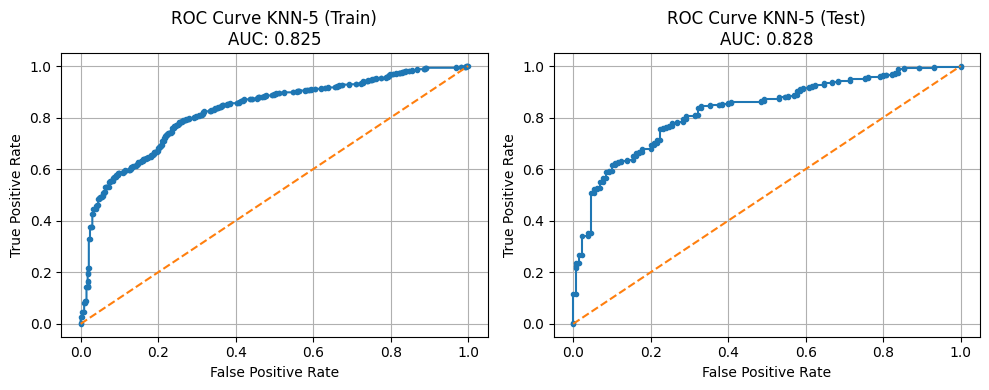

In [186]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

probs_train = NNH.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, probs_train)
auc_train = roc_auc_score(y_train, probs_train)
ax[0].plot(fpr_train, tpr_train, marker='.')
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve KNN-5 (Train)\nAUC: {:.3f}'.format(auc_train))
ax[0].grid(True)


probs_test = NNH.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, probs_test)
auc_test = roc_auc_score(y_test, probs_test)
ax[1].plot(fpr_test, tpr_test, marker='.')
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve KNN-5 (Test)\nAUC: {:.3f}'.format(auc_test))
ax[1].grid(True)

plt.tight_layout() 
plt.show()

In [55]:
ac_scores = []

for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

MCE = [round(1 - x, 3) for x in ac_scores]
MCE

[0.229, 0.192, 0.179, 0.17, 0.181, 0.183, 0.181, 0.186, 0.168, 0.168]

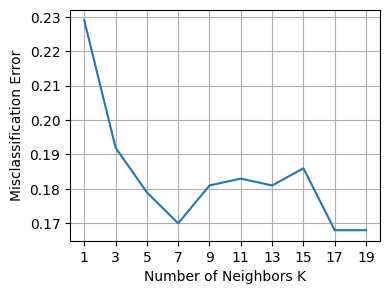

In [59]:
plt.figure(figsize=(4,3))
plt.plot(range(1,20,2), MCE)
plt.grid(True)
plt.xticks(range(1,20,2))
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error');

In [187]:
KNN_model=KNeighborsClassifier(n_neighbors=17)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [86]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(f'Model Score for KNN-17 Train: {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Model Score for KNN-17 Train: 0.7

Confusion Matrix:
[[ 22 310]
 [  6 729]]
              precision    recall  f1-score   support

           0       0.79      0.07      0.12       332
           1       0.70      0.99      0.82       735

    accuracy                           0.70      1067
   macro avg       0.74      0.53      0.47      1067
weighted avg       0.73      0.70      0.60      1067



In [87]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(f'Model Score for KNN-17 Test: {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Model Score for KNN-17 Test: 0.74

Confusion Matrix:
[[ 12 118]
 [  2 326]]
              precision    recall  f1-score   support

           0       0.86      0.09      0.17       130
           1       0.73      0.99      0.84       328

    accuracy                           0.74       458
   macro avg       0.80      0.54      0.51       458
weighted avg       0.77      0.74      0.65       458



In [88]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

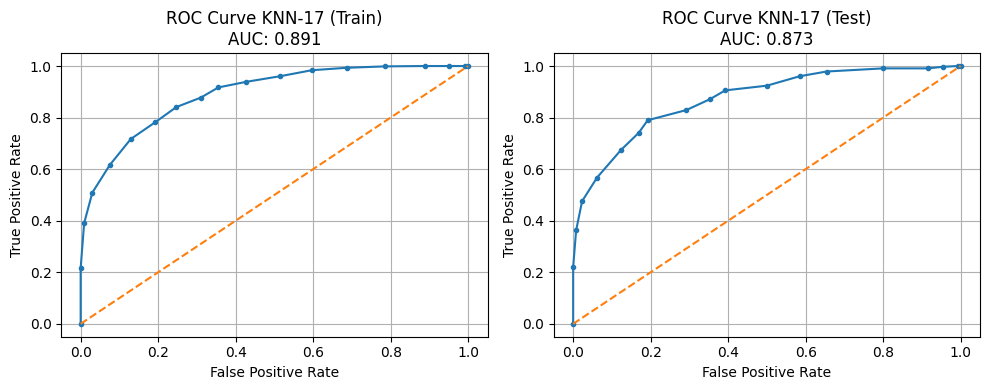

In [189]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

probs_train = KNN_model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, probs_train)
auc_train = roc_auc_score(y_train, probs_train)
ax[0].plot(fpr_train, tpr_train, marker='.')
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve KNN-17 (Train)\nAUC: {:.3f}'.format(auc_train))
ax[0].grid(True)


probs_test = KNN_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, probs_test)
auc_test = roc_auc_score(y_test, probs_test)
ax[1].plot(fpr_test, tpr_test, marker='.')
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve KNN-17 (Test)\nAUC: {:.3f}'.format(auc_test))
ax[1].grid(True)

plt.tight_layout() 
plt.show()


## Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB

### Train Test Split w/o Scaling

In [89]:
X = df_encode.drop('Vote', axis=1)

In [90]:
y = df_encode['Vote']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [92]:
NB_model = GaussianNB()

In [93]:
NB_model.fit(X_train, y_train)

GaussianNB()

In [81]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(f'Model Score for Naive Bayes Train: {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Model Score for Naive Bayes Train: 0.83

Confusion Matrix:
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [94]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(f'Model Score for Naive Bayes Test: {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Model Score for Naive Bayes Test: 0.83

Confusion Matrix:
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



### Cross Validation on Naive Bayes 

In [45]:
from sklearn.model_selection import cross_val_score

In [48]:
train_scores = cross_val_score(NB_model, X_train, y_train, cv=5)
train_scores.round(2)

array([0.82, 0.83, 0.82, 0.86, 0.82])

In [49]:
test_scores = cross_val_score(NB_model, X_test, y_test, cv=5)
test_scores.round(2)

array([0.85, 0.82, 0.78, 0.88, 0.85])

In [51]:
np.mean(train_scores).round(2)

0.83

In [52]:
np.mean(test_scores).round(2)

0.83

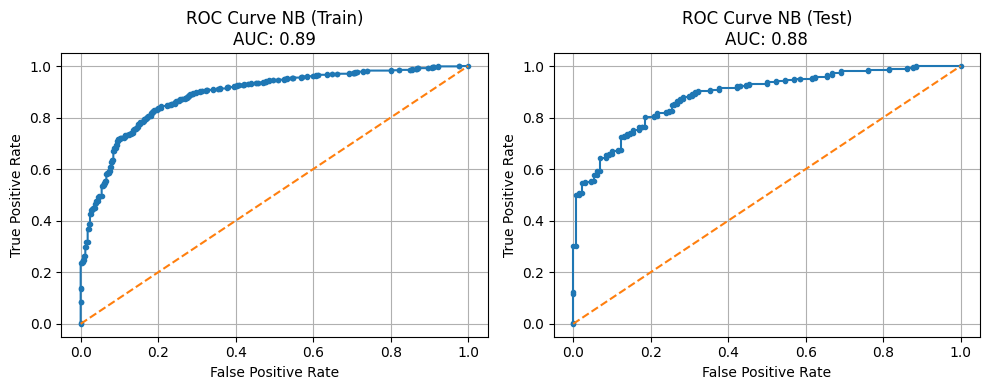

In [234]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

probs_train = NB_model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, probs_train)
auc_train = roc_auc_score(y_train, probs_train)
ax[0].plot(fpr_train, tpr_train, marker='.')
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve NB (Train)\nAUC: {:.2f}'.format(auc_train))
ax[0].grid(True)


probs_test = NB_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, probs_test)
auc_test = roc_auc_score(y_test, probs_test)
ax[1].plot(fpr_test, tpr_test, marker='.')
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve NB (Test)\nAUC: {:.2f}'.format(auc_test))
ax[1].grid(True)

plt.tight_layout() 
plt.show()

## Bagging - Random Forest

In [95]:
X = df_encode.drop('Vote', axis=1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
RF_model = RandomForestClassifier(n_estimators=100, random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [101]:
y_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(f'Model Score for Random Forest (Train): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Model Score for Random Forest (Train): 1.0

Confusion Matrix:
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [102]:
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(f'Model Score for Random Forest (Test): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Model Score for Random Forest (Test): 0.82

Confusion Matrix:
[[ 90  40]
 [ 42 286]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



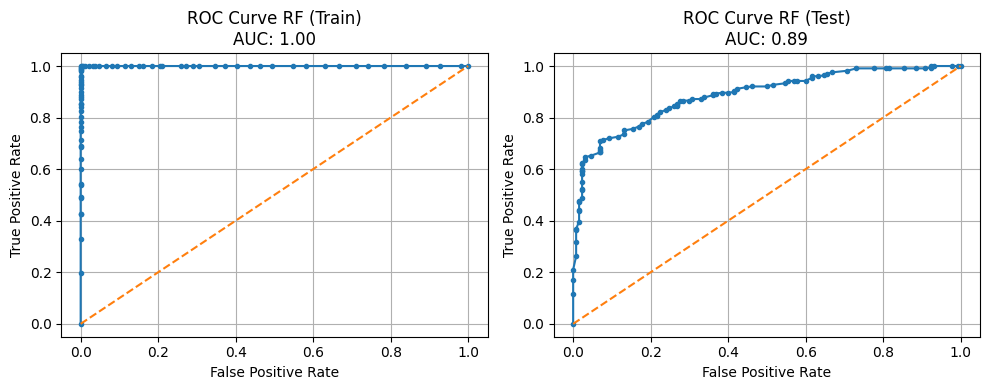

In [236]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

probs_train = RF_model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, probs_train)
auc_train = roc_auc_score(y_train, probs_train)
ax[0].plot(fpr_train, tpr_train, marker='.')
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve RF (Train)\nAUC: {:.2f}'.format(auc_train))
ax[0].grid(True)


probs_test = RF_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, probs_test)
auc_test = roc_auc_score(y_test, probs_test)
ax[1].plot(fpr_test, tpr_test, marker='.')
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve RF (Test)\nAUC: {:.2f}'.format(auc_test))
ax[1].grid(True)

plt.tight_layout() 
plt.show()

In [209]:
print (pd.DataFrame(RF_model.feature_importances_.round(2), columns = ["Imp"],\
                    index = X_train.columns).sort_values('Imp',ascending=False))

                           Imp
Age                       0.21
Europe                    0.21
Hague                     0.18
Blair                     0.12
Political Knowledge       0.09
Economic Cond. National   0.08
Economic Cond. Household  0.08
Gender                    0.03


### Tuning using RandomizedSearchCV

In [106]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [156]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_

In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
rf = RandomForestClassifier()

In [108]:
randomized_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, \
                                       n_iter=10, cv=5, scoring='accuracy', \
                                       random_state=42, error_score='raise')

In [109]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [110]:
best_params = randomized_search.best_params_

In [111]:
print('Best Parameters:', best_params)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 5}


In [112]:
best_model = randomized_search.best_estimator_

In [113]:
y_train_predict = best_model.predict(X_train)
model_score = best_model.score(X_train, y_train)
print(f'Model Score for Random Forest Tuned (Train): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Model Score for Random Forest Tuned (Train): 0.87

Confusion Matrix:
[[241  91]
 [ 51 684]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.77       332
           1       0.88      0.93      0.91       735

    accuracy                           0.87      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.86      0.87      0.86      1067



In [114]:
y_test_predict = best_model.predict(X_test)
model_score = best_model.score(X_test, y_test)
print(f'Model Score for Random Forest Tuned (Test): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Model Score for Random Forest Tuned (Test): 0.83

Confusion Matrix:
[[ 87  43]
 [ 34 294]]
              precision    recall  f1-score   support

           0       0.72      0.67      0.69       130
           1       0.87      0.90      0.88       328

    accuracy                           0.83       458
   macro avg       0.80      0.78      0.79       458
weighted avg       0.83      0.83      0.83       458



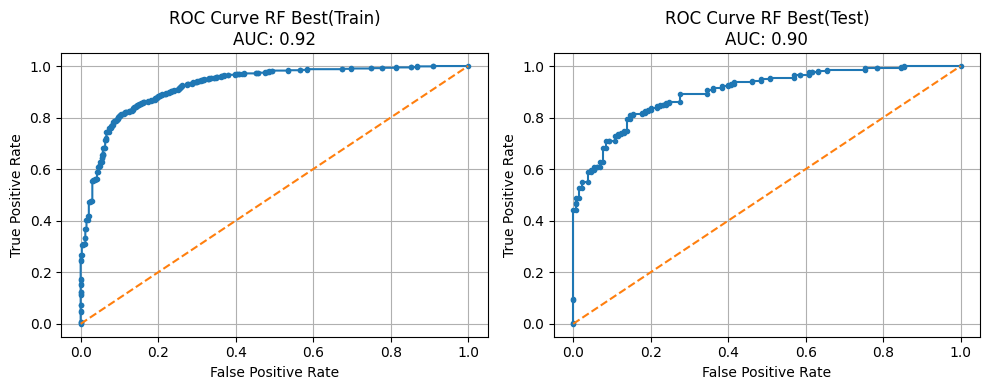

In [257]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

probs_train = best_model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, probs_train)
auc_train = roc_auc_score(y_train, probs_train)
ax[0].plot(fpr_train, tpr_train, marker='.')
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve RF Best(Train)\nAUC: {:.2f}'.format(auc_train))
ax[0].grid(True)


probs_test = best_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, probs_test)
auc_test = roc_auc_score(y_test, probs_test)
ax[1].plot(fpr_test, tpr_test, marker='.')
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve RF Best(Test)\nAUC: {:.2f}'.format(auc_test))
ax[1].grid(True)

plt.tight_layout() 
plt.show()

In [258]:
print (pd.DataFrame(best_model.feature_importances_.round(2), columns = ["Imp"],\
                    index = X_train.columns).sort_values('Imp',ascending=False))

                           Imp
Hague                     0.30
Europe                    0.23
Blair                     0.18
Political Knowledge       0.09
Economic Cond. National   0.08
Age                       0.07
Economic Cond. Household  0.04
Gender                    0.01


## Ada Boosting

In [115]:
from sklearn.ensemble import AdaBoostClassifier

In [116]:
ADB_model = AdaBoostClassifier(n_estimators=100, random_state=1, algorithm='SAMME')
ADB_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=1)

In [117]:
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(f'Model Score for AdaBoost (Train): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Model Score for AdaBoost (Train): 0.85

Confusion Matrix:
[[234  98]
 [ 64 671]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       332
           1       0.87      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067



In [118]:
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(f'Model Score for AdaBoost (Test): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Model Score for AdaBoost (Test): 0.81

Confusion Matrix:
[[ 85  45]
 [ 40 288]]
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       130
           1       0.86      0.88      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



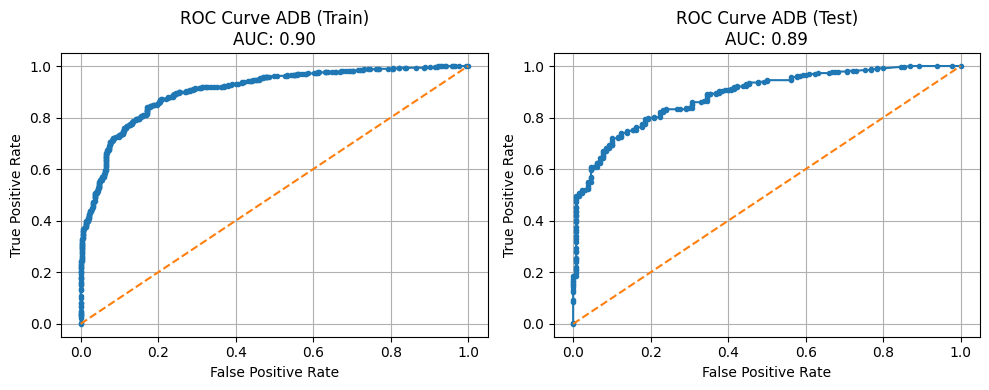

In [259]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

probs_train = ADB_model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, probs_train)
auc_train = roc_auc_score(y_train, probs_train)
ax[0].plot(fpr_train, tpr_train, marker='.')
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve ADB (Train)\nAUC: {:.2f}'.format(auc_train))
ax[0].grid(True)


probs_test = ADB_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, probs_test)
auc_test = roc_auc_score(y_test, probs_test)
ax[1].plot(fpr_test, tpr_test, marker='.')
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve ADB (Test)\nAUC: {:.2f}'.format(auc_test))
ax[1].grid(True)

plt.tight_layout() 
plt.show()

In [260]:
print (pd.DataFrame(ADB_model.feature_importances_.round(2), columns = ["Imp"],\
                    index = X_train.columns).sort_values('Imp',ascending=False))

                           Imp
Blair                     0.27
Age                       0.21
Europe                    0.17
Hague                     0.16
Political Knowledge       0.10
Economic Cond. National   0.06
Economic Cond. Household  0.02
Gender                    0.01


### Adaboost Model Tuning

In [119]:
from scipy.stats import randint

In [120]:
adaboost = AdaBoostClassifier(algorithm='SAMME')

In [121]:
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]}

In [122]:
random_search = RandomizedSearchCV(adaboost, param_distributions=param_dist, \
                                   n_iter=10, cv=5, random_state=42)

In [123]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(algorithm='SAMME'),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1.0],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x10afb5490>},
                   random_state=42)

In [124]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 149}


### Results using tuned Model

In [125]:
best_ada_model = random_search.best_estimator_

In [126]:
y_train_predict = best_ada_model.predict(X_train)
model_score = best_ada_model.score(X_train, y_train)
print(f'Model Score for AdaBoost, Tuned (Train): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Model Score for AdaBoost, Tuned (Train): 0.85

Confusion Matrix:
[[233  99]
 [ 66 669]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       332
           1       0.87      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.81      1067
weighted avg       0.84      0.85      0.84      1067



In [127]:
y_test_predict = best_ada_model.predict(X_test)
model_score = best_ada_model.score(X_test, y_test)
print(f'Model Score for AdaBoost, Tuned (Test): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Model Score for AdaBoost, Tuned (Test): 0.81

Confusion Matrix:
[[ 85  45]
 [ 40 288]]
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       130
           1       0.86      0.88      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



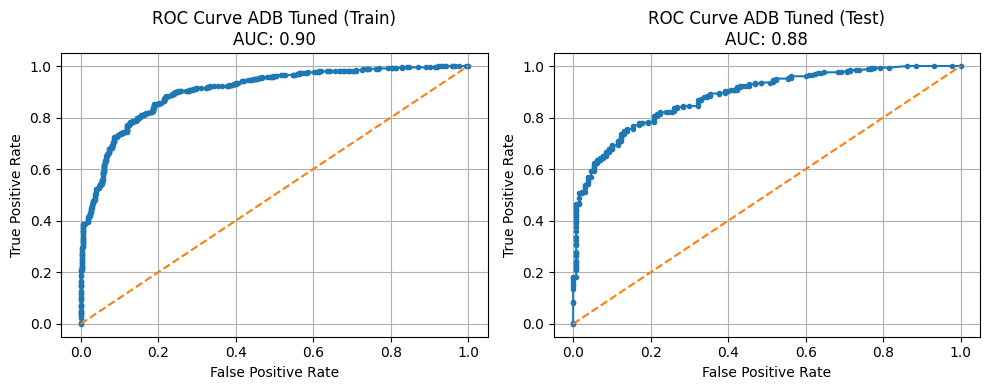

In [191]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

probs_train = best_ada_model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, probs_train)
auc_train = roc_auc_score(y_train, probs_train)
ax[0].plot(fpr_train, tpr_train, marker='.')
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve ADB Tuned (Train)\nAUC: {:.2f}'.format(auc_train))
ax[0].grid(True)


probs_test = best_ada_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, probs_test)
auc_test = roc_auc_score(y_test, probs_test)
ax[1].plot(fpr_test, tpr_test, marker='.')
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve ADB Tuned (Test)\nAUC: {:.2f}'.format(auc_test))
ax[1].grid(True)

plt.tight_layout() 
plt.show()

In [214]:
print (pd.DataFrame(best_ada_model.feature_importances_.round(2), columns = ["Imp"],\
                    index = X_train.columns).sort_values('Imp',ascending=False))

                           Imp
Blair                     0.26
Age                       0.25
Europe                    0.16
Hague                     0.15
Political Knowledge       0.10
Economic Cond. National   0.05
Economic Cond. Household  0.02
Gender                    0.01


## Gradient Boosting

In [128]:
from sklearn.ensemble import GradientBoostingClassifier

In [129]:
gbcl = GradientBoostingClassifier(random_state=1)

In [130]:
gbcl = gbcl.fit(X_train, y_train)

In [131]:
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(f'Model Score for Gradient Boost (Train): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Model Score for Gradient Boost (Train): 0.89

Confusion Matrix:
[[262  70]
 [ 51 684]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



In [132]:
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(f'Model Score for Gradient Boost (Test): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Model Score for Gradient Boost (Test): 0.83

Confusion Matrix:
[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



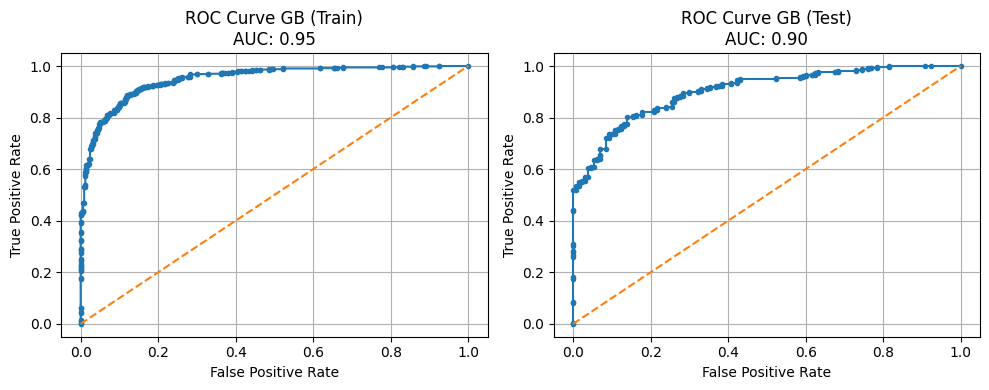

In [262]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

probs_train = gbcl.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, probs_train)
auc_train = roc_auc_score(y_train, probs_train)
ax[0].plot(fpr_train, tpr_train, marker='.')
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve GB (Train)\nAUC: {:.2f}'.format(auc_train))
ax[0].grid(True)


probs_test = gbcl.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, probs_test)
auc_test = roc_auc_score(y_test, probs_test)
ax[1].plot(fpr_test, tpr_test, marker='.')
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve GB (Test)\nAUC: {:.2f}'.format(auc_test))
ax[1].grid(True)

plt.tight_layout() 
plt.show()

In [274]:
print (pd.DataFrame(gbcl.feature_importances_.round(2), columns = ["Imp"],\
                    index = X_train.columns).sort_values('Imp',ascending=False))

                           Imp
Hague                     0.35
Europe                    0.19
Blair                     0.18
Age                       0.11
Political Knowledge       0.11
Economic Cond. National   0.04
Economic Cond. Household  0.02
Gender                    0.00


### Gradient Boost Model Tuning

In [133]:
gb_classifier = GradientBoostingClassifier()

In [134]:
param_dist = {
    'n_estimators': randint(50, 200), 
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0], 
    'max_depth': randint(3, 10)}

In [135]:
random_search = RandomizedSearchCV(gb_classifier, param_distributions=param_dist,\
                                  n_iter=10, cv=5, random_state=42)

In [136]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1.0],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x12da01650>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x12d9fda90>},
                   random_state=42)

In [137]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 108}


### Results using tuned Model

In [138]:
best_gb_model = random_search.best_estimator_

In [139]:
y_train_predict = best_gb_model.predict(X_train)
model_score = best_gb_model.score(X_train, y_train)
print(f'Model Score for Gradient Boost, Tuned (Train): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Model Score for Gradient Boost, Tuned (Train): 0.88

Confusion Matrix:
[[236  96]
 [ 37 698]]
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       332
           1       0.88      0.95      0.91       735

    accuracy                           0.88      1067
   macro avg       0.87      0.83      0.85      1067
weighted avg       0.87      0.88      0.87      1067



In [140]:
y_test_predict = best_gb_model.predict(X_test)
model_score = best_gb_model.score(X_test, y_test)
print(f'Model Score for Gradient Boost, Tuned (Test): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Model Score for Gradient Boost, Tuned (Test): 0.81

Confusion Matrix:
[[ 81  49]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.69      0.62      0.66       130
           1       0.86      0.89      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.76      0.76       458
weighted avg       0.81      0.81      0.81       458



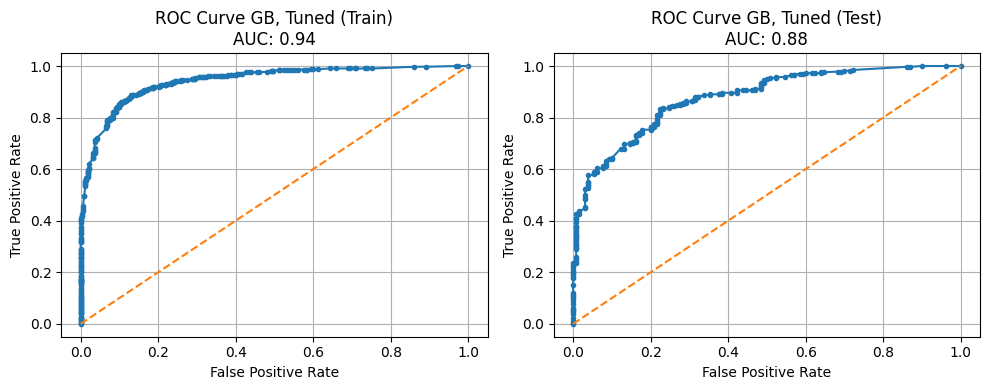

In [192]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

probs_train = best_gb_model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, probs_train)
auc_train = roc_auc_score(y_train, probs_train)
ax[0].plot(fpr_train, tpr_train, marker='.')
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve GB, Tuned (Train)\nAUC: {:.2f}'.format(auc_train))
ax[0].grid(True)


probs_test = best_gb_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, probs_test)
auc_test = roc_auc_score(y_test, probs_test)
ax[1].plot(fpr_test, tpr_test, marker='.')
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve GB, Tuned (Test)\nAUC: {:.2f}'.format(auc_test))
ax[1].grid(True)

plt.tight_layout() 
plt.show()

In [275]:
print (pd.DataFrame(best_gb_model.feature_importances_.round(2), columns = ["Imp"],\
                    index = X_train.columns).sort_values('Imp',ascending=False))

                           Imp
Hague                     0.38
Europe                    0.18
Blair                     0.16
Political Knowledge       0.12
Age                       0.09
Economic Cond. National   0.04
Economic Cond. Household  0.02
Gender                    0.01


# SMOTE

In [141]:
from imblearn.over_sampling import SMOTE

In [142]:
sm = SMOTE(random_state=2)

In [143]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.to_numpy())

In [201]:
from collections import Counter

In [208]:
print('Original dataset :',Counter(y_train))
print('After SMOTE :',Counter(y_train_res))

Original dataset : Counter({1: 735, 0: 332})
After SMOTE : Counter({1: 735, 0: 735})


## Naive Bayes with SMOTE

In [144]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [145]:
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(f'Model Score for Naive Bayes, SMOTE (Train): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

Model Score for Naive Bayes, SMOTE (Train): 0.83

Confusion Matrix:
[[599 136]
 [120 615]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       735
           1       0.82      0.84      0.83       735

    accuracy                           0.83      1470
   macro avg       0.83      0.83      0.83      1470
weighted avg       0.83      0.83      0.83      1470



In [146]:
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(f'Model Score for Naive Bayes, SMOTE (Test): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Model Score for Naive Bayes, SMOTE (Test): 0.8

Confusion Matrix:
[[103  27]
 [ 65 263]]
              precision    recall  f1-score   support

           0       0.61      0.79      0.69       130
           1       0.91      0.80      0.85       328

    accuracy                           0.80       458
   macro avg       0.76      0.80      0.77       458
weighted avg       0.82      0.80      0.81       458



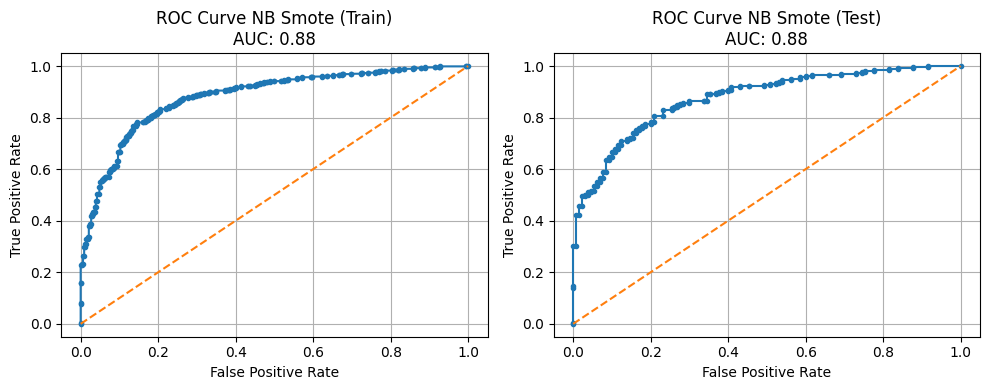

In [290]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

probs_train = NB_SM_model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, probs_train)
auc_train = roc_auc_score(y_train, probs_train)
ax[0].plot(fpr_train, tpr_train, marker='.')
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve NB Smote (Train)\nAUC: {:.2f}'.format(auc_train))
ax[0].grid(True)


probs_test = NB_SM_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, probs_test)
auc_test = roc_auc_score(y_test, probs_test)
ax[1].plot(fpr_test, tpr_test, marker='.')
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve NB Smote (Test)\nAUC: {:.2f}'.format(auc_test))
ax[1].grid(True)

plt.tight_layout() 
plt.show()

## KNN with SMOTE

In [147]:
X = X_encode.apply(zscore)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [149]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.to_numpy())

In [150]:
KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [151]:
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(f'Model Score for KNN, SMOTE (Train): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

Model Score for KNN, SMOTE (Train): 0.88

Confusion Matrix:
[[688  47]
 [125 610]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       735
           1       0.93      0.83      0.88       735

    accuracy                           0.88      1470
   macro avg       0.89      0.88      0.88      1470
weighted avg       0.89      0.88      0.88      1470



In [152]:
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(f'Model Score for KNN, SMOTE (Test): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Model Score for KNN, SMOTE (Test): 0.78

Confusion Matrix:
[[107  23]
 [ 79 249]]
              precision    recall  f1-score   support

           0       0.58      0.82      0.68       130
           1       0.92      0.76      0.83       328

    accuracy                           0.78       458
   macro avg       0.75      0.79      0.75       458
weighted avg       0.82      0.78      0.79       458



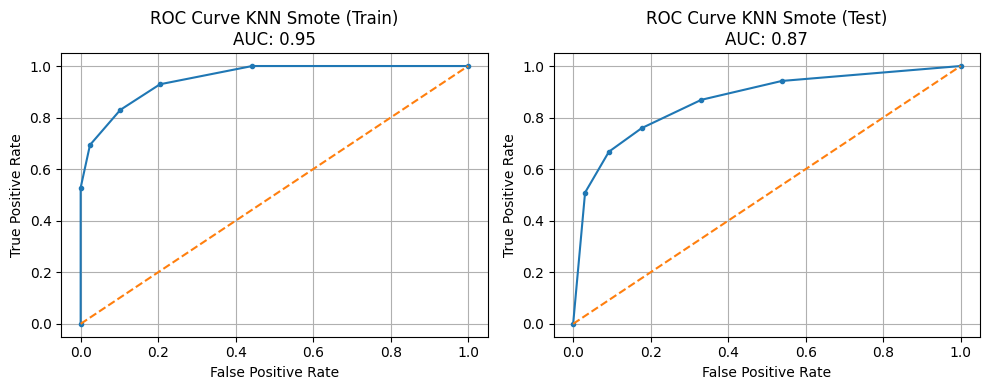

In [299]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

probs_train = KNN_SM_model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, probs_train)
auc_train = roc_auc_score(y_train, probs_train)
ax[0].plot(fpr_train, tpr_train, marker='.')
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve KNN Smote (Train)\nAUC: {:.2f}'.format(auc_train))
ax[0].grid(True)


probs_test = KNN_SM_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, probs_test)
auc_test = roc_auc_score(y_test, probs_test)
ax[1].plot(fpr_test, tpr_test, marker='.')
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve KNN Smote (Test)\nAUC: {:.2f}'.format(auc_test))
ax[1].grid(True)

plt.tight_layout() 
plt.show()

## Bagging with SMOTE

In [160]:
X = df_encode.drop('Vote', axis=1)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [162]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.to_numpy())

In [163]:
RF_SM_model=RandomForestClassifier()
RF_SM_model.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [164]:
y_train_predict = RF_SM_model.predict(X_train_res)
model_score = RF_SM_model.score(X_train_res, y_train_res)
print(f'Model Score for Random Forest, SMOTE (Train): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

Model Score for Random Forest, SMOTE (Train): 1.0

Confusion Matrix:
[[734   1]
 [  1 734]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       735
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1470
   macro avg       1.00      1.00      1.00      1470
weighted avg       1.00      1.00      1.00      1470



In [165]:
y_test_predict = RF_SM_model.predict(X_test)
model_score = RF_SM_model.score(X_test, y_test)
print(f'Model Score for Random Forest, SMOTE (Test): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Model Score for Random Forest, SMOTE (Test): 0.81

Confusion Matrix:
[[ 99  31]
 [ 54 274]]
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       130
           1       0.90      0.84      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.80      0.78       458
weighted avg       0.83      0.81      0.82       458



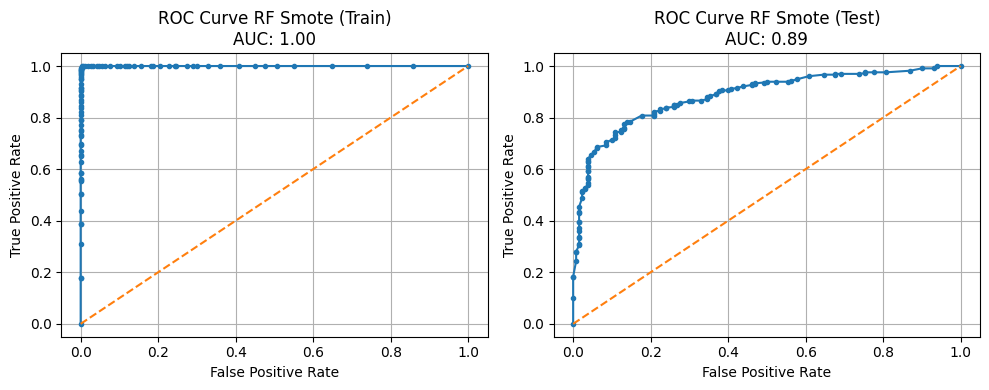

In [307]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

probs_train = RF_SM_model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, probs_train)
auc_train = roc_auc_score(y_train, probs_train)
ax[0].plot(fpr_train, tpr_train, marker='.')
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve RF Smote (Train)\nAUC: {:.2f}'.format(auc_train))
ax[0].grid(True)


probs_test = RF_SM_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, probs_test)
auc_test = roc_auc_score(y_test, probs_test)
ax[1].plot(fpr_test, tpr_test, marker='.')
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve RF Smote (Test)\nAUC: {:.2f}'.format(auc_test))
ax[1].grid(True)

plt.tight_layout() 
plt.show()

## AdaBoosting with SMOTE

In [166]:
ADB_SM_model=AdaBoostClassifier(algorithm='SAMME')
ADB_SM_model.fit(X_train_res,y_train_res)

AdaBoostClassifier(algorithm='SAMME')

In [168]:
y_train_predict = ADB_SM_model.predict(X_train_res)
model_score = ADB_SM_model.score(X_train_res, y_train_res)
print(f'Model Score for AdaBoost, SMOTE (Train): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

Model Score for AdaBoost, SMOTE (Train): 0.84

Confusion Matrix:
[[628 107]
 [124 611]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       735
           1       0.85      0.83      0.84       735

    accuracy                           0.84      1470
   macro avg       0.84      0.84      0.84      1470
weighted avg       0.84      0.84      0.84      1470



In [169]:
y_test_predict = ADB_SM_model.predict(X_test)
model_score = ADB_SM_model.score(X_test, y_test)
print(f'Model Score for AdaBoost, SMOTE (Test): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Model Score for AdaBoost, SMOTE (Test): 0.79

Confusion Matrix:
[[100  30]
 [ 64 264]]
              precision    recall  f1-score   support

           0       0.61      0.77      0.68       130
           1       0.90      0.80      0.85       328

    accuracy                           0.79       458
   macro avg       0.75      0.79      0.76       458
weighted avg       0.82      0.79      0.80       458



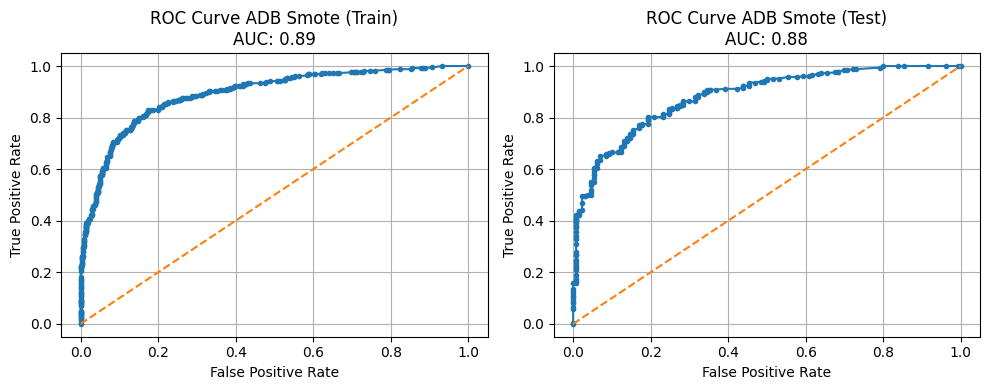

In [312]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

probs_train = ADB_SM_model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, probs_train)
auc_train = roc_auc_score(y_train, probs_train)
ax[0].plot(fpr_train, tpr_train, marker='.')
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve ADB Smote (Train)\nAUC: {:.2f}'.format(auc_train))
ax[0].grid(True)


probs_test = ADB_SM_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, probs_test)
auc_test = roc_auc_score(y_test, probs_test)
ax[1].plot(fpr_test, tpr_test, marker='.')
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve ADB Smote (Test)\nAUC: {:.2f}'.format(auc_test))
ax[1].grid(True)

plt.tight_layout() 
plt.show()

## Gradient Boosting with SMOTE

In [170]:
GB_SM_model=GradientBoostingClassifier()
GB_SM_model.fit(X_train_res,y_train_res)

GradientBoostingClassifier()

In [172]:
y_train_predict = GB_SM_model.predict(X_train_res)
model_score = GB_SM_model.score(X_train_res, y_train_res)
print(f'Model Score for Gradient Boost, SMOTE (Train): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

Model Score for Gradient Boost, SMOTE (Train): 0.9

Confusion Matrix:
[[670  65]
 [ 83 652]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       735
           1       0.91      0.89      0.90       735

    accuracy                           0.90      1470
   macro avg       0.90      0.90      0.90      1470
weighted avg       0.90      0.90      0.90      1470



In [173]:
y_test_predict = GB_SM_model.predict(X_test)
model_score = GB_SM_model.score(X_test, y_test)
print(f'Model Score for Gradient Boost, SMOTE (Test): {round(model_score,2)}\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Model Score for Gradient Boost, SMOTE (Test): 0.82

Confusion Matrix:
[[107  23]
 [ 61 267]]
              precision    recall  f1-score   support

           0       0.64      0.82      0.72       130
           1       0.92      0.81      0.86       328

    accuracy                           0.82       458
   macro avg       0.78      0.82      0.79       458
weighted avg       0.84      0.82      0.82       458



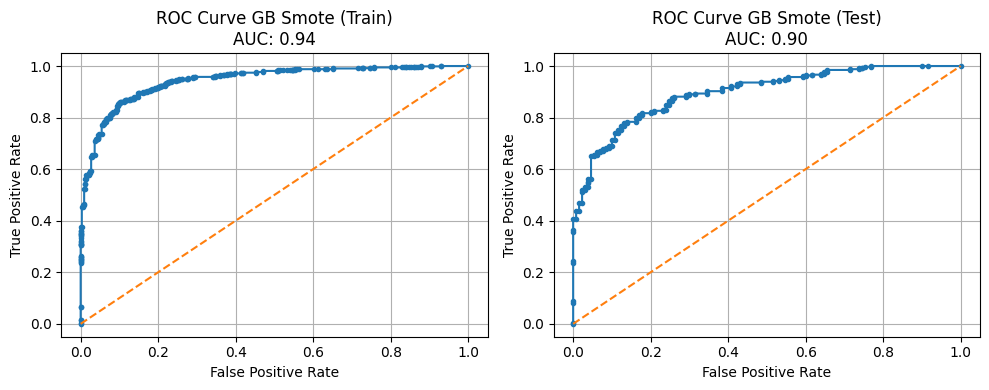

In [316]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

probs_train = GB_SM_model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, probs_train)
auc_train = roc_auc_score(y_train, probs_train)
ax[0].plot(fpr_train, tpr_train, marker='.')
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve GB Smote (Train)\nAUC: {:.2f}'.format(auc_train))
ax[0].grid(True)


probs_test = GB_SM_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, probs_test)
auc_test = roc_auc_score(y_test, probs_test)
ax[1].plot(fpr_test, tpr_test, marker='.')
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve GB Smote (Test)\nAUC: {:.2f}'.format(auc_test))
ax[1].grid(True)

plt.tight_layout() 
plt.show()